In [2]:
import sys,importlib
sys.path.append('../')
import simulation
from numpy import *
from sympy import *
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline
init_printing()

In [3]:
Variables=symbols("x1 y1 z1 x2 y2 z2")
x1,y1,z1,x2,y2,z2 = Variables
Time=symbols("t")
t=Time
Parameters = symbols("sigma beta rho  w a0 a1 omega")
sigma,beta,rho,w,a0,a1,omega = Parameters

### Lorenz System

In [4]:
F=Matrix([sigma*(y1-x1),x1*(rho-z1)-y1,x1*y1-beta*z1,
          sigma*(y2-x2),x2*(rho-z2)-y2,x2*y2-beta*z2])
F

⎡  σ⋅(-x₁ + y₁)  ⎤
⎢                ⎥
⎢x₁⋅(ρ - z₁) - y₁⎥
⎢                ⎥
⎢ -β⋅z₁ + x₁⋅y₁  ⎥
⎢                ⎥
⎢  σ⋅(-x₂ + y₂)  ⎥
⎢                ⎥
⎢x₂⋅(ρ - z₂) - y₂⎥
⎢                ⎥
⎣ -β⋅z₂ + x₂⋅y₂  ⎦

In [5]:
zeta=Matrix([0,0,0,
             0,0,0])

zeta

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

### Synchrony

In [6]:
phi=Matrix([(x2-x1-(a0 + a1*sin(w*t))), y2-y1, z2-z1])
phi

⎡-a₀ - a₁⋅sin(t⋅w) - x₁ + x₂⎤
⎢                           ⎥
⎢         -y₁ + y₂          ⎥
⎢                           ⎥
⎣         -z₁ + z₂          ⎦

In [7]:
N=simulation.VectorDivergence(phi,Variables)
N

⎡-1  0   0   1  0  0⎤
⎢                   ⎥
⎢0   -1  0   0  1  0⎥
⎢                   ⎥
⎣0   0   -1  0  0  1⎦

In [8]:
on_manifold = [(x2,x1+(a0 + a1*sin(w*t))),(y2,y1),(z2,z1)]


### Invariance

In [9]:
NF=N*(F+zeta)
NF

⎡    -σ⋅(-x₁ + y₁) + σ⋅(-x₂ + y₂)    ⎤
⎢                                    ⎥
⎢-x₁⋅(ρ - z₁) + x₂⋅(ρ - z₂) + y₁ - y₂⎥
⎢                                    ⎥
⎣    β⋅z₁ - β⋅z₂ - x₁⋅y₁ + x₂⋅y₂     ⎦

In [10]:
dPhi=diff(phi,Time)
dPhi

⎡-a₁⋅w⋅cos(t⋅w)⎤
⎢              ⎥
⎢      0       ⎥
⎢              ⎥
⎣      0       ⎦

In [11]:
eqn=(NF+dPhi)
simplify(eqn)

⎡-a₁⋅w⋅cos(t⋅w) + σ⋅(x₁ - y₁) - σ⋅(x₂ - y₂)⎤
⎢                                          ⎥
⎢   -x₁⋅(ρ - z₁) + x₂⋅(ρ - z₂) + y₁ - y₂   ⎥
⎢                                          ⎥
⎣       β⋅z₁ - β⋅z₂ - x₁⋅y₁ + x₂⋅y₂        ⎦

In [12]:
zeta[3]=-(eqn)[0]
zeta[4]=-(eqn)[1]
zeta[5]=-(eqn)[2]
simplify(zeta)

⎡                    0                    ⎤
⎢                                         ⎥
⎢                    0                    ⎥
⎢                                         ⎥
⎢                    0                    ⎥
⎢                                         ⎥
⎢a₁⋅w⋅cos(t⋅w) - σ⋅(x₁ - y₁) + σ⋅(x₂ - y₂)⎥
⎢                                         ⎥
⎢   x₁⋅(ρ - z₁) - x₂⋅(ρ - z₂) - y₁ + y₂   ⎥
⎢                                         ⎥
⎣      -β⋅z₁ + β⋅z₂ + x₁⋅y₁ - x₂⋅y₂       ⎦

In [13]:
zeta=zeta.subs(on_manifold)
#zeta = simplify(zeta)
zeta

⎡                              0                               ⎤
⎢                                                              ⎥
⎢                              0                               ⎥
⎢                                                              ⎥
⎢                              0                               ⎥
⎢                                                              ⎥
⎢a₁⋅w⋅cos(t⋅w) + σ⋅(-x₁ + y₁) - σ⋅(-a₀ - a₁⋅sin(t⋅w) - x₁ + y₁)⎥
⎢                                                              ⎥
⎢        x₁⋅(ρ - z₁) - (ρ - z₁)⋅(a₀ + a₁⋅sin(t⋅w) + x₁)        ⎥
⎢                                                              ⎥
⎣              x₁⋅y₁ - y₁⋅(a₀ + a₁⋅sin(t⋅w) + x₁)              ⎦

In [14]:
NF=N*(F+zeta)
simplify(NF)
simplify(NF+dPhi).subs(on_manifold)

⎡                                 0                                  ⎤
⎢                                                                    ⎥
⎢(-ρ + z₁)⋅(a₀ + a₁⋅sin(t⋅w) + x₁) + (ρ - z₁)⋅(a₀ + a₁⋅sin(t⋅w) + x₁)⎥
⎢                                                                    ⎥
⎣                                 0                                  ⎦

In [15]:
NZ=N*zeta
NZ

⎡a₁⋅w⋅cos(t⋅w) + σ⋅(-x₁ + y₁) - σ⋅(-a₀ - a₁⋅sin(t⋅w) - x₁ + y₁)⎤
⎢                                                              ⎥
⎢        x₁⋅(ρ - z₁) - (ρ - z₁)⋅(a₀ + a₁⋅sin(t⋅w) + x₁)        ⎥
⎢                                                              ⎥
⎣              x₁⋅y₁ - y₁⋅(a₀ + a₁⋅sin(t⋅w) + x₁)              ⎦

### Stability

In [445]:
chi=Matrix([0,0,0,
            #-sigma*(y2-y1),-(rho-z1)*(x2-x1-(a0+a1*sin(w*t))),beta*(z2-z1)])
            -sigma*(y2-y1),-(rho-z1)*((x2-x1-(a0+a1*sin(w*t)))),beta*(z2-z1)])


chi

⎡                   0                   ⎤
⎢                                       ⎥
⎢                   0                   ⎥
⎢                                       ⎥
⎢                   0                   ⎥
⎢                                       ⎥
⎢             -σ⋅(-y₁ + y₂)             ⎥
⎢                                       ⎥
⎢(-ρ + z₁)⋅(-a₀ - a₁⋅sin(t⋅w) - x₁ + x₂)⎥
⎢                                       ⎥
⎣             β⋅(-z₁ + z₂)              ⎦

In [446]:
del_zeta=simulation.VectorDivergence(zeta,Variables)
del_zeta

⎡0          0                 0          0  0  0⎤
⎢                                               ⎥
⎢0          0                 0          0  0  0⎥
⎢                                               ⎥
⎢0          0                 0          0  0  0⎥
⎢                                               ⎥
⎢0          0                 0          0  0  0⎥
⎢                                               ⎥
⎢0          0          a₀ + a₁⋅sin(t⋅w)  0  0  0⎥
⎢                                               ⎥
⎣0  -a₀ - a₁⋅sin(t⋅w)         0          0  0  0⎦

In [447]:
del_chi=simulation.VectorDivergence(chi,Variables)
del_chi

⎡  0     0               0                  0     0   0⎤
⎢                                                      ⎥
⎢  0     0               0                  0     0   0⎥
⎢                                                      ⎥
⎢  0     0               0                  0     0   0⎥
⎢                                                      ⎥
⎢  0     σ               0                  0     -σ  0⎥
⎢                                                      ⎥
⎢ρ - z₁  0  -a₀ - a₁⋅sin(t⋅w) - x₁ + x₂  -ρ + z₁  0   0⎥
⎢                                                      ⎥
⎣  0     0              -β                  0     0   β⎦

In [448]:
del_F=simulation.VectorDivergence(F,Variables)
del_F

⎡  -σ    σ    0     0     0    0 ⎤
⎢                                ⎥
⎢ρ - z₁  -1  -x₁    0     0    0 ⎥
⎢                                ⎥
⎢  y₁    x₁  -β     0     0    0 ⎥
⎢                                ⎥
⎢  0     0    0     -σ    σ    0 ⎥
⎢                                ⎥
⎢  0     0    0   ρ - z₂  -1  -x₂⎥
⎢                                ⎥
⎣  0     0    0     y₂    x₂  -β ⎦

In [449]:
(del_F+del_zeta+del_chi)

⎡  -σ            σ             0         0     0    0 ⎤
⎢                                                     ⎥
⎢ρ - z₁         -1            -x₁        0     0    0 ⎥
⎢                                                     ⎥
⎢  y₁           x₁             -β        0     0    0 ⎥
⎢                                                     ⎥
⎢  0             σ             0        -σ     0    0 ⎥
⎢                                                     ⎥
⎢ρ - z₁          0          -x₁ + x₂  z₁ - z₂  -1  -x₂⎥
⎢                                                     ⎥
⎣  0     -a₀ - a₁⋅sin(t⋅w)     -β       y₂     x₂   0 ⎦

In [450]:
N*(del_F+del_zeta+del_chi)

⎡ σ             0             0     -σ     0    0 ⎤
⎢                                                 ⎥
⎢ 0             1             x₂  z₁ - z₂  -1  -x₂⎥
⎢                                                 ⎥
⎣-y₁  -a₀ - a₁⋅sin(t⋅w) - x₁  0     y₂     x₂   0 ⎦

In [451]:
diff(N,t)*N.transpose()

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [452]:
Jac = N*(del_F+del_zeta+del_chi)*N.transpose() + diff(N,t)*N.transpose()
Jac = simplify(Jac)
Jac=Jac.subs(on_manifold)
Jac

⎡-2⋅σ               0                            0              ⎤
⎢                                                               ⎥
⎢ 0                -2               -2⋅a₀ - 2⋅a₁⋅sin(t⋅w) - 2⋅x₁⎥
⎢                                                               ⎥
⎣2⋅y₁  2⋅a₀ + 2⋅a₁⋅sin(t⋅w) + 2⋅x₁               0              ⎦

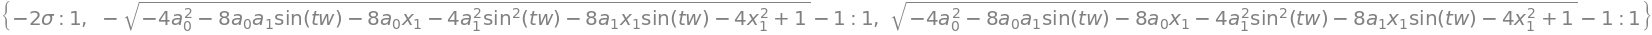

In [453]:
Jac.eigenvals()

In [132]:
beta=8/3
sigma = 10
(sigma-beta)**2